<a href="https://colab.research.google.com/github/xtianu/CV_Tirana/blob/main/M3_Image%20Classification/Exercise4_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MODULE 3: IMAGE CLASSIFICATION

Christian Mata, PhD


# **EXERCISE 4**

Connecting to Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#1. Generate synthetic image with random blobs

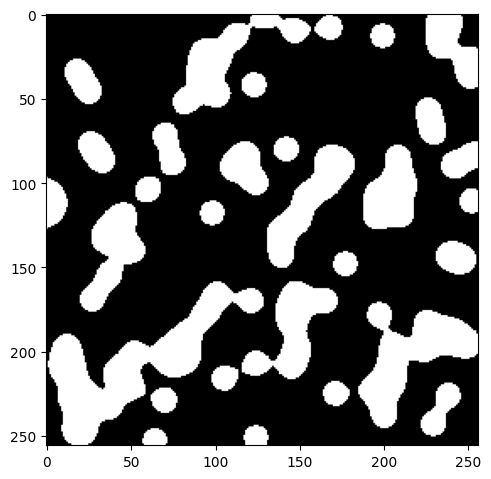

In [2]:
from skimage import data, measure
import skimage as sk
import matplotlib.pyplot as plt

IG = data.binary_blobs(length=256, blob_size_fraction=0.1,volume_fraction=0.3)

fig = plt.figure(figsize=(5,5))
plt.imshow(IG,cmap='gray')
plt.tight_layout()
plt.show()

# 2. Object segmentation and labeling

- Segmentation of blobs using Otsu's optimal threshold
- Labeling connected regions
- Visualization



/usr/local/lib/python3.11/dist-packages/skimage/exposure/exposure.py:306: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  hist, bin_edges = np.histogram(image, bins=bins, range=hist_range)


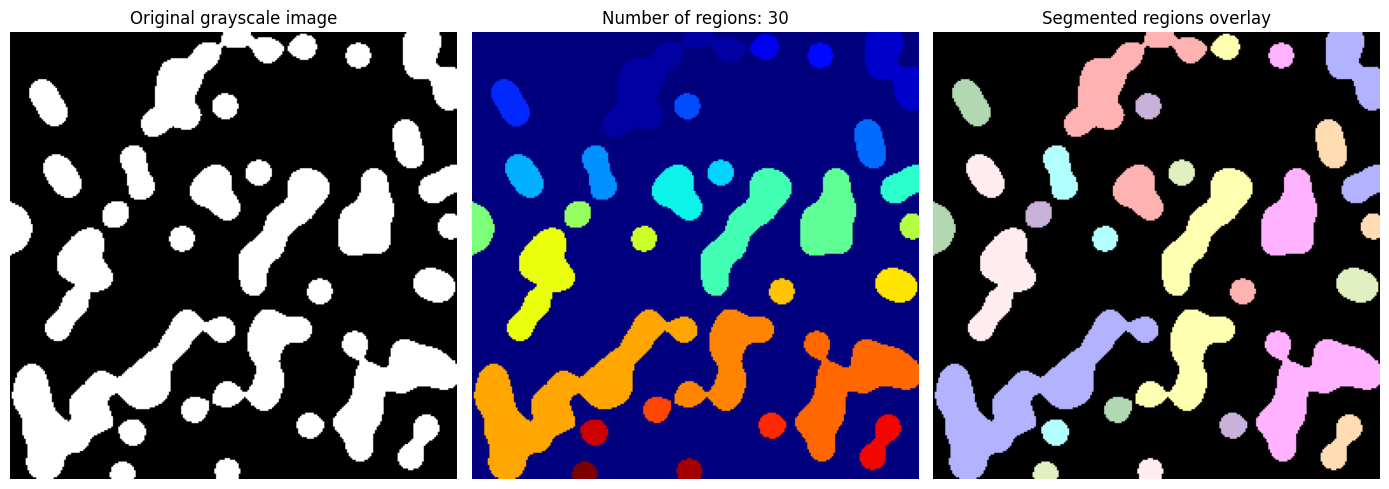

In [3]:
from skimage.filters import threshold_otsu
from skimage.measure import label
from skimage.color import label2rgb

# Apply Otsu threshold for segmentation :
thresh = threshold_otsu(IG)
bw = IG > thresh # keep lighter regions with grayscale intensities above threshold

# label image regions:
label_image, nregions = label(bw,return_num=True)
image_label_overlay = label2rgb(label_image, image=IG)

# Get some figures:
fig, axes = plt.subplots(1,3,figsize=(14, 9))
ax = axes.ravel()
ax[0].imshow(IG,cmap=plt.cm.gray)
ax[0].set_title('Original grayscale image')
ax[1].imshow(label_image,cmap=plt.cm.jet)
ax[1].set_title('Number of regions: {}'.format(nregions)) # set figure title
ax[2].imshow(image_label_overlay,cmap=plt.cm.jet)
ax[2].set_title('Segmented regions overlay')

ax[0].set_axis_off()
ax[1].set_axis_off()
ax[2].set_axis_off()
plt.tight_layout()
plt.show()

# 3. Get regional properties in a pandas dataframe

Function documentation with a list of available attributes can be found at https://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.regionprops_table


In [4]:
import pandas as pd

props = measure.regionprops_table(label_image,properties=['label','area','eccentricity','extent','axis_major_length'])

df_features = pd.DataFrame(props)
df_features.head()


,label,area,eccentricity,extent,axis_major_length
0,1,1674.0,0.928654,0.340244,98.971917
1,2,838.0,0.897005,0.600717,53.062071
2,3,187.0,0.448960,0.733333,16.370420
3,4,169.0,0.000000,0.751111,14.679213
4,5,400.0,0.823307,0.673401,30.027863


Represent area of the blobs as a function of the major axis length

<Axes: xlabel='axis_major_length', ylabel='area'>

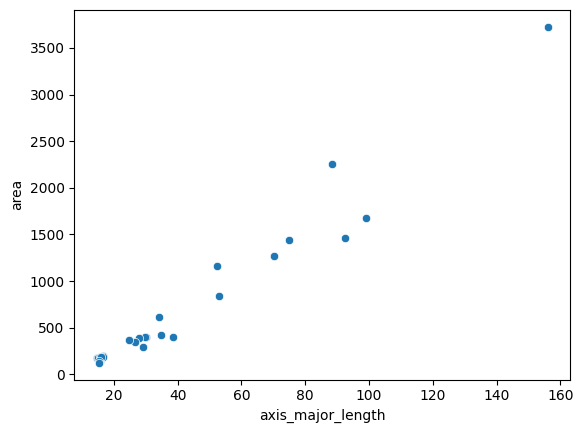

In [5]:
import seaborn as sns

sns.scatterplot(x='axis_major_length',y='area',data=df_features)

Clear correlation between blob's length and area can be observed

#4. Analyze blobs


Since you have the feature data in a pandas dataframe, you can exploit all the functions of te libraries. For instance:

How many blobs have an area above the average?

In [6]:
df_features.loc[df_features['area']>=df_features['area'].mean()]

,label,area,eccentricity,extent,axis_major_length
0,1,1674.0,0.928654,0.340244,98.971917
1,2,838.0,0.897005,0.600717,53.062071
12,13,1464.0,0.969249,0.385669,92.448282
13,14,1163.0,0.820899,0.726875,52.455760
18,19,1270.0,0.916023,0.500986,70.125382
21,22,3727.0,0.943937,0.300177,156.097130
22,23,1437.0,0.881244,0.434664,74.974313
23,24,2251.0,0.801947,0.422723,88.425852


In [7]:
mean_blobs_area = df_features['area'].mean()
df_large_blobs = df_features.loc[df_features['area']>=mean_blobs_area]
N_large = df_large_blobs.shape[0]
print('there are {} blobs with an area larger or equal the mean area {}'.format(N_large,mean_blobs_area))

there are 8 blobs with an area larger or equal the mean area 655.3666666666667


Represent the blobs that have an area smaller than the average blob's area

In [8]:
df_small_blobs = df_features.loc[df_features['area']<mean_blobs_area]
N_small = df_small_blobs.shape[0]
print('there are {} blobs with an area smaller than the mean area {}'.format(N_small,mean_blobs_area))

there are 22 blobs with an area smaller than the mean area 655.3666666666667


find the labels of small and large blobs

In [9]:
labels_small = df_small_blobs['label'].values
print('labels of small blobs: {}'.format(labels_small))
labels_large = df_large_blobs['label'].values
print('labels of large blobs: {}'.format(labels_large))


labels of small blobs: [ 3  4  5  6  7  8  9 10 11 12 15 16 17 18 20 21 25 26 27 28 29 30]
labels of large blobs: [ 1  2 13 14 19 22 23 24]


Create a binary mask with the large and small blobs

In [10]:
import numpy as np
mask_small_blobs = np.isin(label_image,labels_small)
mask_large_blobs = np.isin(label_image,labels_large)

Represent the large and small blobs

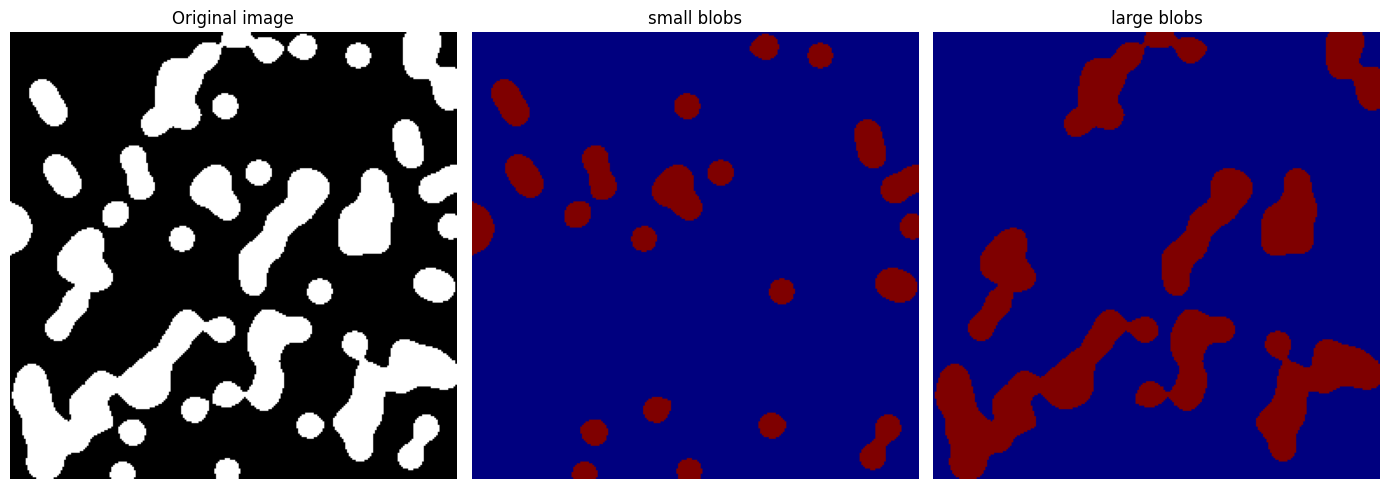

In [11]:
# Get some figures:
fig, axes = plt.subplots(1,3,figsize=(14, 9))
ax = axes.ravel()
ax[0].imshow(IG,cmap=plt.cm.gray)
ax[0].set_title('Original image')
ax[1].imshow(mask_small_blobs,cmap=plt.cm.jet)
ax[1].set_title('small blobs') # set figure title
ax[2].imshow(mask_large_blobs,cmap=plt.cm.jet)
ax[2].set_title('large blobs')

ax[0].set_axis_off()
ax[1].set_axis_off()
ax[2].set_axis_off()
plt.tight_layout()
plt.show()